1.1 เมื่อกำหนดให้ฟังก์ชันเป้าหมายคือ sin(pi*x) และสุ่มข้อมูลด้วยการแจกแจงแบบเอกรูปออกมา 2 ตัวอย่างในช่วง [-1,1]

Analytic Method Calculate from Wolfram Alpha

- Linear Regression

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import sympy as sy
from sympy import *

sy.init_printing()
x1, x2 ,x= sy.symbols("x1 , x2, x")

f = sin(pi*x)
g_d = (sin(pi*x1)+(sin(pi*x2)*(x-x1)+sin(pi*x1)*(x1-x))/(x2-x1))

g_bar = (sy.integrate(sy.integrate(g_d,(x1,-1,1)),(x2,-1,1)))/4

bias_x = (g_bar - f)**2
bias = (sy.integrate(bias_x,(x,-1,1)))/2

Var = (g_d - g_bar)**2
var_x = (sy.integrate(sy.integrate(Var,(x1,-1,1)),(x2,-1,1)))/4
variance = (sy.integrate(var_x,(x,-1,1)))/2

variance.evalf()
bias.evalf()

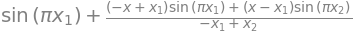

In [51]:
gd = (sin(pi*x1)+(sin(pi*x2)*(x-x1)+sin(pi*x1)*(x1-x))/(x2-x1))
gd

In [27]:
print('Linear regression')
print('gd is (sin(pi*x1)+(sin(pi*x2)(x-x1)+sin(pi*x1)(x1-x))/(x2-x1)')
print('g_bar is 3.10372/4*')
print('Varaince is',1.6762875)
print('Bias is',0.2067167)
print('(gd - gd_mean)^2 = (sin(pi*x1)+(sin(pi*x2)(x-x1)+sin(pi*x1)(x1-x))/(x2-x1)- 3.10372/4*x)^2')

Varaince is 1.6762875
Bias is 0.2067167


- Through the origin

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import sympy as sy
from sympy import *

sy.init_printing()
x1, x2 ,x= sy.symbols("x1 , x2, x")

f = sin(pi*x)
g_d = x*(x1*sin(pi*x1)+x2*sin(pi*x2))/(x1**2+x2**2)

g_bar = (sy.integrate(sy.integrate(g_d,(x1,-1,1)),(x2,-1,1)))/4

bias_x = (g_bar - f)**2
bias = (sy.integrate(bias_x,(x,-1,1)))/2

Var = (g_d - g_bar)**2
var_x = (sy.integrate(sy.integrate(Var,(x1,-1,1)),(x2,-1,1)))/4
variance = (sy.integrate(var_x,(x,-1,1)))/2

variance.evalf()
bias.evalf()

In [28]:
print('Regression through origin')
print('gd is x(x1*sin(pi*x1)+x2*sin(pi*x2))/(x1^2+x2^2)')
print('g_bar is 5.71211/4*x')
print('Varaince is',0.23657625)
print('Bias is',0.27064)
print('(gd - gd_mean)^2 = (x(x1*sin(pi*x1)+x2*sin(pi*x2))/(x1^2+x2^2) - 5.71211/4*x)^2')

Varaince is 0.23657625
Bias is 0.27064


- Constant Model

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import sympy as sy
from sympy import *

sy.init_printing()
x1, x2 ,x= sy.symbols("x1 , x2, x")

f = sin(pi*x)
g_d = (sin(pi*x1)+sin(pi*x2))/2

g_bar = (sy.integrate(sy.integrate(g_d,(x1,-1,1)),(x2,-1,1)))/4

bias_x = (g_bar - f)**2
bias = (sy.integrate(bias_x,(x,-1,1)))/2

Var = (g_d - g_bar)**2
var_x = (sy.integrate(sy.integrate(Var,(x1,-1,1)),(x2,-1,1)))/4
variance = (sy.integrate(var_x,(x,-1,1)))/2

print('Variance is : ',variance.evalf())
print('Bias is : ',bias.evalf())

Variance is :  0.250000000000000
Bias is :  0.500000000000000


In [29]:
print('Constant')
print('gd is ((sin(pi*x1)+sin(pi*x2))/2)')
print('g_bar is 0')
print('Varaince is',0.25)
print('Bias is',0.5)
print('(gd - gd_mean)^2 = ((sin(pi*x1)+sin(pi*x2))/2)^2')

Varaince is 0.25
Bias is 0.5


Simulation

- Linear Regression

Bias value: 0.2044
variant value: 1.6352


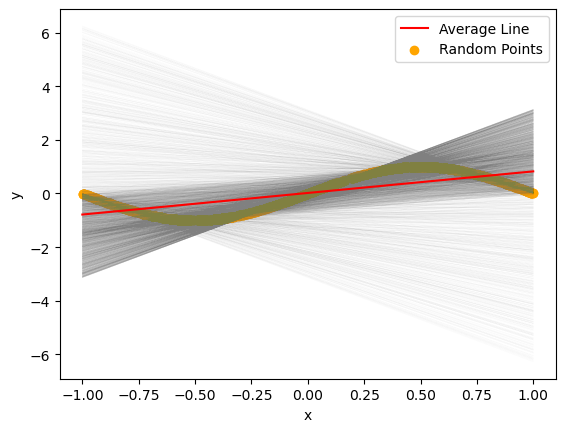

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad,dblquad

def Normal_Equation(X,Y):
    A = np.dot(X.T ,X)
    B = np.dot(X.T , Y)
    A_I = np.linalg.inv(A)
    W = np.dot(A_I,B)
    return W

lines = []
z = np.random.uniform(-1, 1, size=(1000, 1))
listTheta = []
AllModel = []
x = np.linspace(-1, 1, 1000)

for i in range(5000):
  X = np.random.choice(z.ravel(), size=2, replace=False)
  X = np.array(X)
  X = X.reshape(-1, 1)
  Y = np.sin(np.pi * X)

  X_with_intercept = np.c_[np.ones((X.shape[0], 1)), X]

  theta = Normal_Equation(X_with_intercept, Y)
  listTheta.append(theta)

  y = theta[0] + theta[1]*x
  AllModel.append(y)
  plt.plot(x, y,linewidth = 0.1,alpha=0.1,color='grey')


def MSE ():
    theta = Normal_Equation(X_with_intercept,Y)
    w0 = theta[0]
    w1 = theta[1]
    S = 0
    S = np.sum(((w0 + w1*X)-Y)**2)
    return S/(2*len(X))

mean_theta = np.average(listTheta,axis=0)
arrayY = np.array(np.sin(np.pi * x))
y_bar = mean_theta[0] + mean_theta[1]*x
AllModel_array = np.array(AllModel)

z = np.random.uniform(-1, 1, size=(1000, 1))
a = np.sin(np.pi * z)

bias_value = np.mean((y_bar - arrayY)**2)
variant_value = np.mean((AllModel_array - y_bar)**2)

print("Bias value:", round(bias_value,4))
print("variant value:", round(variant_value,4))

plt.plot(x,y_bar,color='red', label='Average Line')

plt.scatter(z, a, color='orange', label='Random Points')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

- Through the origin

Bias value: 0.2871
variant value: 0.2327


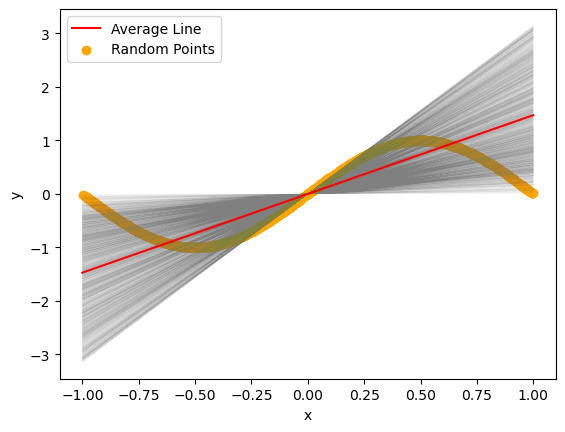

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad,dblquad

def Normal_Equation(X,Y):
    A = np.dot(X.T ,X)
    B = np.dot(X.T , Y)
    A_I = np.linalg.inv(A)
    W = np.dot(A_I,B)
    return W


lines = []
z = np.random.uniform(-1, 1, size=(1000, 1))
listTheta = []
AllModel = []
x = np.linspace(-1, 1, 1000)

for i in range(5000):
  X = np.random.choice(z.ravel(), size=2, replace=False)
  X = np.array(X)
  X = X.reshape(-1, 1)
  Y = np.sin(np.pi * X)


  theta = Normal_Equation(X, Y)
  listTheta.append(theta)

  y = theta[0]*x
  AllModel.append(y)
  plt.plot(x, y,linewidth = 0.1,alpha=0.1,color='grey')


def MSE ():
    theta = Normal_Equation(X_with_intercept,Y)
    w0 = theta[0]
    w1 = theta[1]
    S = 0
    S = np.sum(((w0 + w1*X)-Y)**2)
    return S/(2*len(X))

mean_theta = np.average(listTheta,axis=0)
arrayY = np.array(np.sin(np.pi * x))
y_bar = mean_theta[0]*x
AllModel_array = np.array(AllModel)

z = np.random.uniform(-1, 1, size=(1000, 1))
a = np.sin(np.pi * z)

bias_value = np.mean((y_bar - arrayY)**2)
variant_value = np.mean((AllModel_array - y_bar)**2)

print("Bias value:", round(bias_value,4))
print("variant value:", round(variant_value,4))

plt.plot(x,y_bar,color='red', label='Average Line')

plt.scatter(z, a, color='orange', label='Random Points')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

- Constant Model

Bias value: 0.4997
variant value: 0.2431


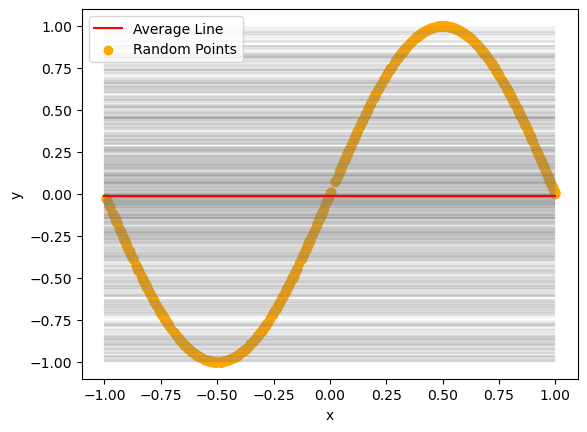

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad,dblquad

def Normal_Equation(X,Y):
    A = np.dot(X.T ,X)
    B = np.dot(X.T , Y)
    A_I = np.linalg.inv(A)
    W = np.dot(A_I,B)
    return W

lines = []
z = np.random.uniform(-1, 1, size=(1000, 1))
listTheta = []
AllModel = []
x = np.linspace(-1, 1, 1000)

for i in range(1000):
  X = np.random.choice(z.ravel(), size=2, replace=False)
  X = np.array(X)
  X = X.reshape(-1, 1)
  Y = np.mean(np.sin(np.pi * X))
  y_range = [Y for x in x]
  AllModel.append(Y)

  plt.plot(x, y_range,linewidth = 0.1,color='grey')


def MSE ():
    theta = Normal_Equation(X_with_intercept,Y)
    w0 = theta[0]
    w1 = theta[1]
    S = 0
    S = np.sum(((w0 + w1*X)-Y)**2)
    return S/(2*len(X))

arrayY = np.array(np.sin(np.pi * x))
y_bar = np.average(AllModel)

AllModel_array = np.array(AllModel)

z = np.random.uniform(-1, 1, size=(1000, 1))
a = np.sin(np.pi * z)

bias_value = np.mean((y_bar - arrayY)**2)
variant_value = np.mean((AllModel_array - y_bar)**2)

print("Bias value:", round(bias_value,4))
print("variant value:", round(variant_value,4))

y_range = [y_bar for x in x]
plt.plot(x,y_range,color='red', label='Average Line')

plt.scatter(z, a, color='orange', label='Random Points')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

1.2 เมื่อกำหนดให้ฟังก์ชันเป้าหมายคือ x^2 และสุ่มข้อมูลด้วยการแจกแจงแบบเอกรูปออกมา 2 ตัวอย่างในช่วง [-1,1]

Analytic Method Calculate from Wolfram Alpha

- Linear Regression

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import sympy as sy
from sympy import *

sy.init_printing()
x1, x2 ,x= sy.symbols("x1 , x2, x")

f = x ** 2
g_d = (x1**2+(x2**2*(x-x1)-x1**2*(x-x1))/(x2-x1))

g_bar = (sy.integrate(sy.integrate(g_d,(x1,-1,1)),(x2,-1,1)))/4

bias_x = (g_bar - f)**2
bias = (sy.integrate(bias_x,(x,-1,1)))/2

Var = (g_d - g_bar)**2
var_x = (sy.integrate(sy.integrate(Var,(x1,-1,1)),(x2,-1,1)))/4
variance = (sy.integrate(var_x,(x,-1,1)))/2

print('Variance is : ',variance.evalf())
print('Bias is : ',bias.evalf())

Variance is :  0.333333333333333
Bias is :  0.200000000000000


In [30]:
print('Linear regression')
print('gd is (x1^2+(x2^2(x-x1)-x1^2(x-x1))/(x2-x1))')
print('g_bar is 0')
print('Varaince is',0.33333375)
print('Bias is',0.2)
print('(gd - gd_mean)^2 = (x1^2+(x2^2(x-x1)-x1^2(x-x1))/(x2-x1))^2')

Varaince is 0.33333375
Bias is 0.2


- Through the origin

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import sympy as sy
from sympy import *

sy.init_printing()
x1, x2 ,x= sy.symbols("x1 , x2, x")

f = x ** 2
g_d = x*(x1**3+x2**3)/(x1**2+x2**2)

g_bar = (sy.integrate(sy.integrate(g_d,(x1,-1,1)),(x2,-1,1)))/4

bias_x = (g_bar - f)**2
bias = (sy.integrate(bias_x,(x,-1,1)))/2

Var = (g_d - g_bar)**2
var_x = (sy.integrate(sy.integrate(Var,(x1,-1,1)),(x2,-1,1)))/4
variance = (sy.integrate(var_x,(x,-1,1)))/2

print('Variance is : ',variance.evalf())
print('bias is : ',bias.evalf())

In [31]:
print('Regression through origin')
print('gd is (x(x1^3+x2^3)/(x1^2+x2^2))^2')
print('g_bar is 0')
print('Varaince is',0.11492125)
print('Bias is',0.2)
print('(gd - gd_mean)^2 = (x(x1^3+x2^3)/(x1^2+x2^2))^2')

Varaince is 0.11492125
Bias is 0.2


- Constant Model

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import sympy as sy
from sympy import *

sy.init_printing()
x1, x2 ,x= sy.symbols("x1 , x2, x")

f = x ** 2
g_d = (x2**2 + x1**2)/2

g_bar = (sy.integrate(sy.integrate(g_d,(x1,-1,1)),(x2,-1,1)))/4

bias_x = (g_bar - f)**2
bias = (sy.integrate(bias_x,(x,-1,1)))/2

Var = (g_d - g_bar)**2
var_x = (sy.integrate(sy.integrate(Var,(x1,-1,1)),(x2,-1,1)))/4
variance = (sy.integrate(var_x,(x,-1,1)))/2

print('Variance is : ',variance.evalf())
print('bias is : ',bias.evalf())

Variance is :  0.0444444444444444
bias is :  0.0888888888888889


In [32]:
print('Constant Model')
print('gd is ((x1^2+x2^2)/2 - 1/3)')
print('g_bar is 1/3*x')
print('Varaince is',0.04444)
print('Bias is',0.08888)
print('(gd - gd_mean)^2 = ((x1^2+x2^2)/2 - 1/3)^2')

Varaince is 0.04444
Bias is 0.08888


Simulation

- Linear Regression

Bias value: 0.1973
variant value: 0.3224


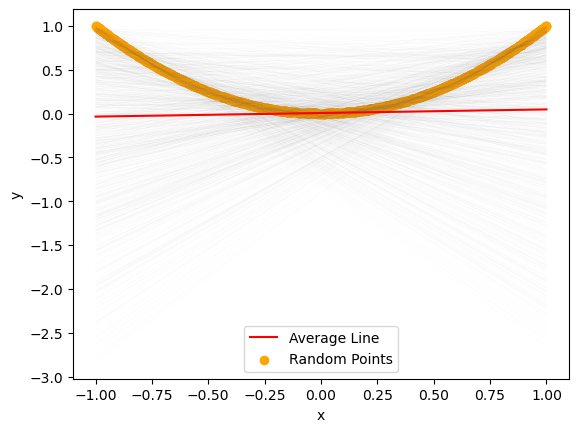

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad,dblquad

def Normal_Equation(X,Y):
    A = np.dot(X.T ,X)
    B = np.dot(X.T , Y)
    A_I = np.linalg.inv(A)
    W = np.dot(A_I,B)
    return W

lines = []
z = np.random.uniform(-1, 1, size=(1000, 1))
listTheta = []
AllModel = []
x = np.linspace(-1, 1, 1000)

for i in range(1000):
  X = np.random.choice(z.ravel(), size=2, replace=False)
  X = np.array(X)
  X = X.reshape(-1, 1)
  Y = X**2

  X_with_intercept = np.c_[np.ones((X.shape[0], 1)), X]

  theta = Normal_Equation(X_with_intercept, Y)
  listTheta.append(theta)

  y = theta[0] + theta[1]*x
  AllModel.append(y)
  plt.plot(x, y,linewidth = 0.1,alpha=0.1,color='grey')


def MSE ():
    theta = Normal_Equation(X_with_intercept,Y)
    w0 = theta[0]
    w1 = theta[1]
    S = 0
    S = np.sum(((w0 + w1*X)-Y)**2)
    return S/(2*len(X))

mean_theta = np.average(listTheta,axis=0)
arrayY = np.array(x**2)
y_bar = mean_theta[0] + mean_theta[1]*x
AllModel_array = np.array(AllModel)

z = np.random.uniform(-1, 1, size=(1000, 1))
a = z ** 2

bias_value = np.mean((y_bar - arrayY)**2)
variant_value = np.mean((AllModel_array - y_bar)**2)

print("Bias value:", round(bias_value,4))
print("variant value:", round(variant_value,4))

plt.plot(x,y_bar,color='red', label='Average Line')

plt.scatter(z, a, color='orange', label='Random Points')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

- Through the origin

Bias value: 0.2008
variant value: 0.1104


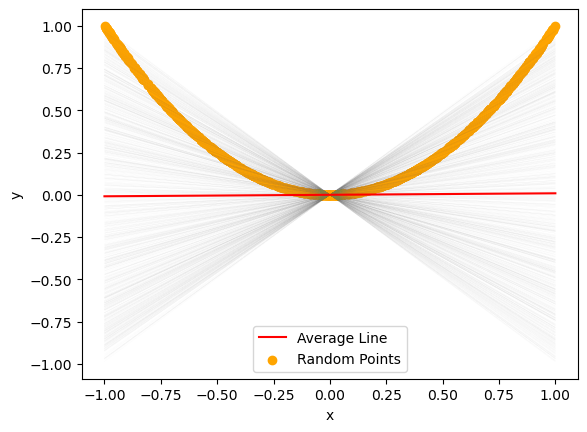

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad,dblquad

def Normal_Equation(X,Y):
    A = np.dot(X.T ,X)
    B = np.dot(X.T , Y)
    A_I = np.linalg.inv(A)
    W = np.dot(A_I,B)
    return W

lines = []
z = np.random.uniform(-1, 1, size=(1000, 1))
listTheta = []
AllModel = []
x = np.linspace(-1, 1, 1000)

for i in range(1000):
  X = np.random.choice(z.ravel(), size=2, replace=False)
  X = np.array(X)
  X = X.reshape(-1, 1)
  Y = X**2

  theta = Normal_Equation(X, Y)
  listTheta.append(theta)

  y = theta[0]*x
  AllModel.append(y)
  plt.plot(x, y,linewidth = 0.1,alpha=0.1,color='grey')


def MSE ():
    theta = Normal_Equation(X_with_intercept,Y)
    w0 = theta[0]
    w1 = theta[1]
    S = 0
    S = np.sum(((w0 + w1*X)-Y)**2)
    return S/(2*len(X))

mean_theta = np.average(listTheta,axis=0)
arrayY = np.array(x**2)
y_bar = mean_theta[0]*x
AllModel_array = np.array(AllModel)

z = np.random.uniform(-1, 1, size=(1000, 1))
a = z ** 2

bias_value = np.mean((y_bar - arrayY)**2)
variant_value = np.mean((AllModel_array - y_bar)**2)

print("Bias value:", round(bias_value,4))
print("variant value:", round(variant_value,4))

plt.plot(x,y_bar,color='red', label='Average Line')

plt.scatter(z, a, color='orange', label='Random Points')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

- Constant Model

Bias value: 0.0894
variant value: 0.0393


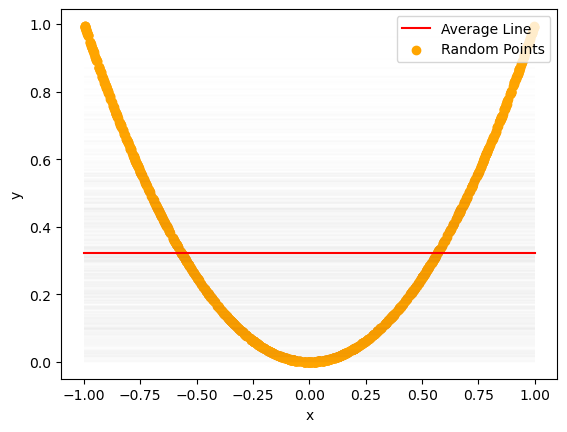

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad,dblquad

def Normal_Equation(X,Y):
    A = np.dot(X.T ,X)
    B = np.dot(X.T , Y)
    A_I = np.linalg.inv(A)
    W = np.dot(A_I,B)
    return W

lines = []
z = np.random.uniform(-1, 1, size=(1000, 1))
listTheta = []
AllModel = []
x = np.linspace(-1, 1, 1000)

for i in range(1000):
  X = np.random.choice(z.ravel(), size=2, replace=False)
  X = np.array(X)
  X = X.reshape(-1, 1)
  Y = np.mean(X**2)
  AllModel.append(Y)
  y_range = [Y for x in x]

  plt.plot(x, y_range,linewidth = 0.1,alpha=0.1,color='grey')


def MSE ():
    theta = Normal_Equation(X_with_intercept,Y)
    w0 = theta[0]
    w1 = theta[1]
    S = 0
    S = np.sum(((w0 + w1*X)-Y)**2)
    return S/(2*len(X))

y_bar = np.average(AllModel,axis=0)
arrayY = np.array(x**2)
AllModel_array = np.array(AllModel)

z = np.random.uniform(-1, 1, size=(1000, 1))
a = z ** 2

bias_value = np.mean((y_bar - arrayY)**2)
variant_value = np.mean((AllModel_array - y_bar)**2)

print("Bias value:", round(bias_value,4))
print("variant value:", round(variant_value,4))

y_range = [y_bar for x in x]

plt.plot(x , y_range,color='red', label='Average Line')

plt.scatter(z, a, color='orange', label='Random Points')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

2. เขียนโปรแกรมสำหรับเส้นโค้งการเรียนรู้เปรียบเทียบระหว่างแบบจำลองค่าคงที่ แบบจำลองเชิงเส้น แบบจำลองเชิงเส้นผ่านจุดกำเนิดและทดลองเพิ่มเติมด้วยการใส่สัญญาณรบกวน

[1.8721281377982495, 0.9261228837093839, 0.5637892582329833, 0.39601207443645026, 0.34364352209600857, 0.29038698229125576, 0.2930593362407183, 0.2610590666724749, 0.25479784459629934, 0.2544595337919522, 0.2493079713777144, 0.242992156604941, 0.2408188677988586, 0.23798411457305746, 0.23165622860750895, 0.2269509004280747, 0.22607092314897936, 0.22554843540616237, 0.22449262907062667, 0.22293080168039914, 0.2233085411298396, 0.22112760167285994, 0.22001268311902683, 0.21661731762871433, 0.21880542493982436, 0.21567406188608754, 0.21647527474733988, 0.21385636897926152]
[2.0232801859427962e-26, 0.02338056309625467, 0.03849309796962903, 0.05224463668156272, 0.05579449196160576, 0.06494257150317322, 0.06639792591643794, 0.071713522660856, 0.07265515935092424, 0.0753907832941583, 0.07615708251289109, 0.07878063659051297, 0.07889395160381461, 0.0792101601203848, 0.08315328932570801, 0.08218646868159292, 0.0829910449195748, 0.08473234971262984, 0.08504603783021021, 0.08601568225971606, 0.08

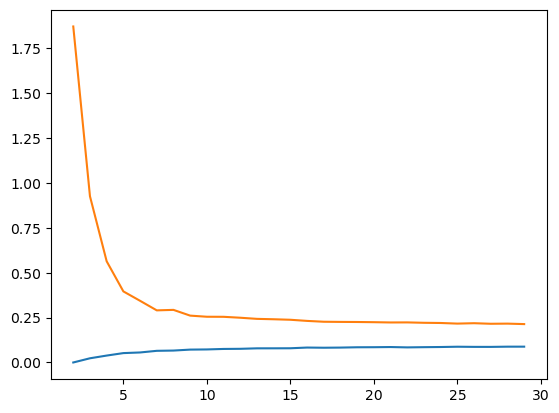

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad,dblquad
import statistics

def Normal_Equation(X,Y):
    A = np.dot(X.T ,X)
    B = np.dot(X.T , Y)
    A_I = np.linalg.inv(A)
    W = np.dot(A_I,B)
    return W

z = np.random.uniform(-1, 1, size=(1000, 1))
x = np.linspace(-1, 1, 1000)
e_out_all =[]
e_in_all =[]

for j in range(2,30):

    lines = []
    listTheta = []
    AllModel = []
    e_in = []
    
    for i in range(500):
        X = np.random.choice(z.ravel(), size=j, replace=False)
        X = np.array(X)
        X = X.reshape(-1, 1)
        Y = np.sin(np.pi * X)

        X_with_intercept = np.c_[np.ones((X.shape[0], 1)), X]

        theta = Normal_Equation(X_with_intercept, Y)
        listTheta.append(theta)
        w0 = theta[0]
        w1 = theta[1]
        S = 0
        S = np.sum(((w0 + w1*X)-Y)**2)
        mse = S/(2*len(X))
        e_in.append(mse)

        y = w0 + w1*x
        AllModel.append(y)
    e_in_all.append(statistics.fmean(e_in))

    mean_theta = np.average(listTheta,axis=0)
    arrayY = np.array(np.sin(np.pi * x))
    y_bar = mean_theta[0] + mean_theta[1]*x
    AllModel_array = np.array(AllModel)

    a = np.sin(np.pi * z)

    bias_value = np.mean((y_bar - arrayY)**2)
    variant_value = np.mean((AllModel_array - y_bar)**2)
    e_out = bias_value + variant_value
    e_out_all.append(e_out)


print(e_out_all)
print(e_in_all)

plt.plot(range(2,len(e_in_all)+2),e_in_all)
plt.plot(range(2,len(e_out_all)+2),e_out_all)
